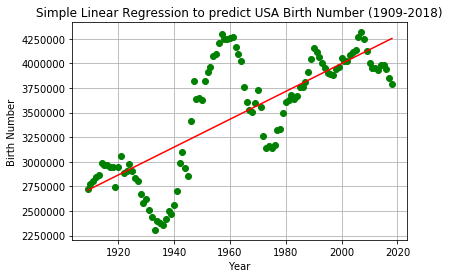

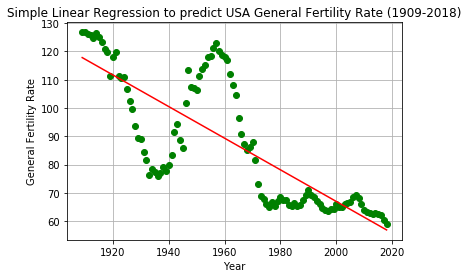

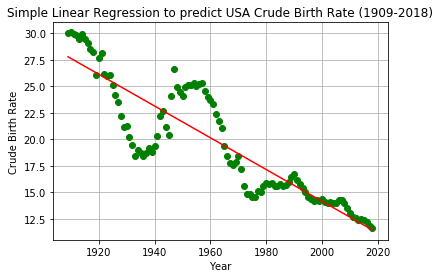

In [21]:
# linear regression equation as simple as drinking water.
# it is nothing but just a straight line equation.
# y = m*x + c
# Reallllyyy!!!! yes, above equation is a simple linear regression equation
# in this prediction model we will try to predict three attributes. These are-
# birth number, general fertility rate, crude birth rate of USA based on dataset 1909-2018 AD.

import csv
import numpy as np
import matplotlib.pyplot as plt

# numpy array declaration for real data of given dataset
real_year                   = np.array([[]], dtype = np.float64)
real_birth_number           = np.array([[]], dtype = np.float64)
real_general_fertility_rate = np.array([[]], dtype = np.float64)
real_crude_birth_rate       = np.array([[]], dtype = np.float64)

# random m and c value of linear regression equation y  = m * x + c
m_birth_number           = np.random.random((1, 1))
c_birth_number           = np.random.random((1, 1))
m_general_fertility_rate = np.random.random((1, 1))
c_general_fertility_rate = np.random.random((1, 1))
m_crude_birth_rate       = np.random.random((1, 1))
c_crude_birth_rate       = np.random.random((1, 1))

n = 0 # dataset_len (will be updated in calculation() below)

def build_dataset():
    global real_year, real_birth_number, real_general_fertility_rate, real_crude_birth_rate
    
    with open('usa_birth_rate_1909_2018.csv', 'r') as f:
        dataset = csv.DictReader(f)
        for data in dataset:
            real_year                   = np.append(real_year,\
                                             [[float(data['Year'])]], axis = 1)
            real_birth_number           = np.append(real_birth_number,\
                                             [[float(data['Birth Number'])]], axis = 1)
            real_general_fertility_rate = np.append(real_general_fertility_rate,\
                                             [[float(data['General Fertility Rate'])]], axis = 1)
            real_crude_birth_rate       = np.append(real_crude_birth_rate,\
                                             [[float(data['Crude Birth Rate'])]], axis = 1)
    return 0

def calculation():
    global n,\
           real_year, real_birth_number, real_fertility_rate, real_crude_birth_rate,\
           m_birth_number,           c_birth_number,\
           m_general_fertility_rate, c_general_fertility_rate,\
           m_crude_birth_rate,       c_crude_birth_rate
    
    # equations of slope m and y-axis interceptor c as follows -
    # m = (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    # c = (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)
    
    n      = real_year.size
    Ex     = np.sum(real_year) # Σx
    E_x2   = np.sum(real_year**2) # Σ(x^2)
    Ex_2   = np.sum(real_year)**2 # (Σx)^2
    denominator = n * E_x2 - Ex_2 # n * Σ(x^2) - (Σx)^2
    
    # m and c calculation for birth number 
    Ey  = np.sum(real_birth_number)             # Σy
    Exy = np.sum(real_year * real_birth_number) # Σ(xy)
    m_birth_number = (n * Exy - Ex * Ey) / denominator    # (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    c_birth_number = (E_x2 * Ey - Ex * Exy) / denominator # (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)
    
    # m and c calculation for birth number 
    Ey  = np.sum(real_general_fertility_rate)                       # Σy
    Exy = np.sum(real_year * real_general_fertility_rate)           # Σ(xy)
    m_general_fertility_rate = (n * Exy - Ex * Ey) / denominator    # (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    c_general_fertility_rate = (E_x2 * Ey - Ex * Exy) / denominator # (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)
    
    # m and c calculation for birth number 
    Ey  = np.sum(real_crude_birth_rate)                   # Σy
    Exy = np.sum(real_year * real_crude_birth_rate) # Σ(xy)
    m_crude_birth_rate = (n * Exy - Ex * Ey) / denominator    # (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    c_crude_birth_rate = (E_x2 * Ey - Ex * Exy) / denominator # (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)

def main():
    build_dataset()
    calculation()
    return 0
    
main()   

# graph plot using matplotlib.pyplot
# graph plot for Year vs Birth Number
plt.figure(1)
X = real_year.reshape(n)
Y = real_birth_number.reshape(n)
plt.plot(X, Y, 'go')
Y = m_birth_number * X + c_birth_number
plt.plot(X, Y, 'r-')
plt.grid(True)
plt.title('Simple Linear Regression to predict USA Birth Number (1909-2018)')
plt.xlabel('Year')
plt.ylabel('Birth Number')

# graph plot for Year vs General Fertility Rate
plt.figure(2)
X = real_year.reshape(n)
Y = real_general_fertility_rate.reshape(n)
plt.plot(X, Y, 'go')
Y = m_general_fertility_rate * X + c_general_fertility_rate
plt.plot(X, Y, 'r-')
plt.grid(True)
plt.title('Simple Linear Regression to predict USA General Fertility Rate (1909-2018)')
plt.xlabel('Year')
plt.ylabel('General Fertility Rate')

# graph plot for Year vs Crude Birth Rate
plt.figure(3)
X = real_year.reshape(n)
Y = real_crude_birth_rate.reshape(n)
plt.plot(X, Y, 'go')
Y = m_crude_birth_rate * X + c_crude_birth_rate
plt.plot(X, Y, 'r-')
plt.grid(True)
plt.title('Simple Linear Regression to predict USA Crude Birth Rate (1909-2018)')
plt.xlabel('Year')
plt.ylabel('Crude Birth Rate')

plt.show()

In [22]:
predict_birth_number = int(input('Enter Year to predict USA Birth Number = '))
print(m_birth_number * predict_birth_number + c_birth_number)

predict_general_fertility_rate = int(input('Enter Year to predict USA General Fertility Rate = '))
print(m_general_fertility_rate * predict_general_fertility_rate + c_general_fertility_rate)

predict_crude_birth_rate = int(input('Enter Year to predict USA Crude Birth Rate = '))
print(m_crude_birth_rate * predict_crude_birth_rate + c_crude_birth_rate)

Enter Year to predict USA Birth Number = 2020
4281420.9746579155
Enter Year to predict USA General Fertility Rate = 2020
55.766783580909305
Enter Year to predict USA Crude Birth Rate = 2020
11.151192660550578
